In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.rc={'figure.figsize': (12, 8)}

In [3]:
# Params:
eye_size = False

In [4]:
if eye_size:
    y = ['radius', 'eye_size']
else:
    y = 'radius'

In [5]:
path = os.getcwd().replace('auxiliaries', 'pupil_deep/eye_test/label/')

In [6]:
def plot_boxplot(dataset, title, path, exam):
    sns.set(style="whitegrid", color_codes=True)
    img = sns.boxplot(data=dataset, y=y).set_title(title)
    img.figure.savefig('{}/{}_{}.pdf'.format(path, title, exam))

In [7]:
def plot_plotline(dataset, title, path, exam):
    img = dataset.plot.line(x='frame', y=y, linestyle='-', markevery=100, marker='o', title=title)
    img.figure.savefig('{}/{}_{}.pdf'.format(path, title, exam))

In [8]:
def outlier_treatment(dataset):
    mean = dataset['radius'].mean()
    std = dataset['radius'].std()    
    
    Q1 = dataset['radius'].quantile(0.25)
    Q3 = dataset['radius'].quantile(0.75)
    IQR = Q3 - Q1

    print(Q1)
    print(Q3)
    
    filter = (dataset['radius'] >= Q1 - 1.5 * IQR) & (dataset['radius'] <= Q3 + 1.5 *IQR)
    return dataset.loc[filter] 

55.0
63.25


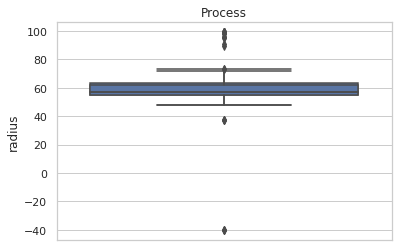

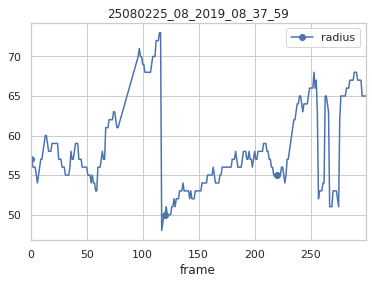

In [9]:
for file in os.listdir(path):
    if '.csv' in file:
        path_data = os.path.join(path, file)
        dataset = pd.read_csv(path_data)
        exam = file.replace('_label.csv', '')
        title = 'exam = {}'.format(exam)
        
        new_dataset = outlier_treatment(dataset)
        # print(dataset.head())
        # print(new_dataset.head())
        
        plot_boxplot(dataset, 'Pre Process', path, exam)
        plot_boxplot(new_dataset, 'Process', path, exam)
        plot_plotline(new_dataset, exam, path, exam)